# Classification Model Experiments For Credit Card Dataset
Author: Alan Joseph


#### My Objective: I want to compare various ML Algorithm from Lab 3 and to see which one had the highest accuracy on the credit default dataset from the UCI library.


#### About Dataset: This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements, etc of credit card clients in Taiwan from April 2005 to September 2005. The dataset had already been cleaned and encoded so I did not have to do that.

##### UCI Credit URL:
https://www.scikit-yb.org/en/latest/api/datasets/credit.html

# P1- Code

## 1. Data Preparation

In [1]:
# Import libraries, packages and ignore warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
data= pd.read_csv('UCI_Credit_Card.csv')

In [3]:
# Checking out what our dataset looks like
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Feature Descriptions:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars 
- SEX: Gender (1 = Male, 2 = Female)
- EDUCATION: (1= Graduate school, 2= University, 3=High School, 4= Others, 5= Unknown, 6=Unknown)
- MARRIAGE: (1 = married, 2 = single, 3 = Others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 
- PAY_3: Repayment status in July, 2005 
- PAY_4: Repayment status in June, 2005 
- PAY_5: Repayment status in May, 2005 
- PAY_6: Repayment status in April, 2005 
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=Yes, 0=No)

##### Although this next step is not always necessary I like to include this command `data.info()` because it gives me a little more information about the dataset such as Non-Null Count and Data Type. This information is good to know because say for example if there were string values we may need to encode our data since only numerical values can be fed into the model.

In [4]:
# More information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

##### I also like to get the Shape to know how big of a dataset i'm dealing with. The result you see below means there are 30,000 entries with 25 columns.

In [5]:
# Get shape of the data
data.shape

(30000, 25)

In [6]:
#Check if null values are present
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## 2. Data Exploration and Inspection

In [7]:
# Categorical features descriptions
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [8]:
# Numerical features descriptions
data[['AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','BILL_AMT2','BILL_AMT3',
'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#### To understand the relationship between features and target classes we can we can create barplots with bars using seaborn `countplot()`

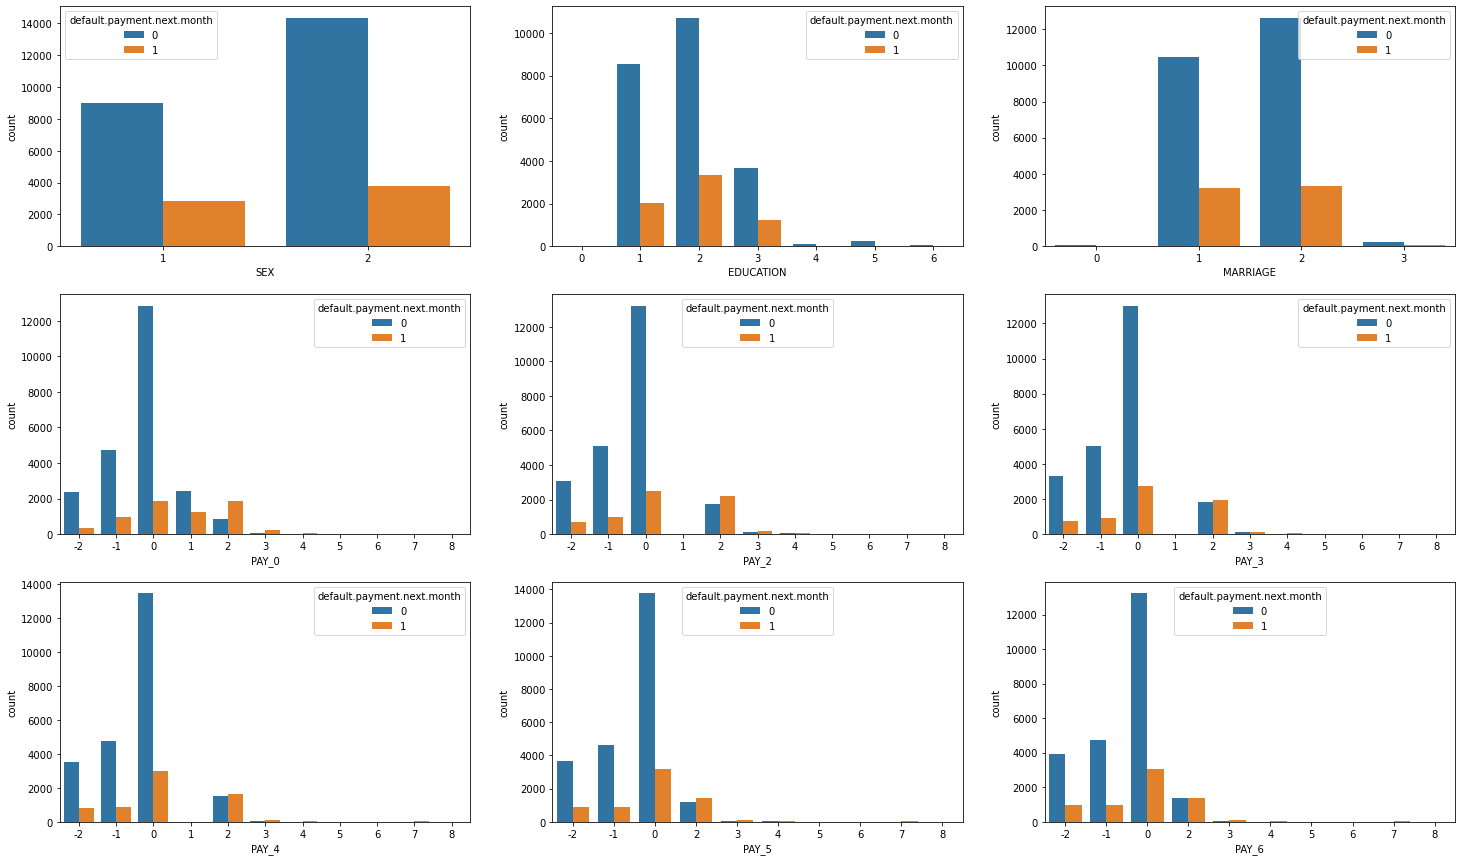

In [9]:
# New dataframe with categorical features
visual = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default.payment.next.month']]

f, axes = plt.subplots(3, 3, figsize=(25, 15))
ax1 = sns.countplot(x="SEX", hue="default.payment.next.month", data=visual, ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=visual, ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=visual, ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default.payment.next.month", data=visual, ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default.payment.next.month", data=visual, ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default.payment.next.month", data=visual, ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default.payment.next.month", data=visual, ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default.payment.next.month", data=visual, ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default.payment.next.month", data=visual, ax=axes[2,2]);

##### Legend

- SEX: (1 = Male, 2 = Female)
- EDUCATION: (1= Graduate school, 2= University, 3=High School, 4= Others, 5= Unknown, 6=Unknown)
- MARRIAGE: (1 = married, 2 = single, 3 = Others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 
- PAY_3: Repayment status in July, 2005 
- PAY_4: Repayment status in June, 2005 
- PAY_5: Repayment status in May, 2005 
- PAY_6: Repayment status in April, 2005 

###  Class (im)balance

I'm also going to check for data imbalance with respect with target value, i.e. default.payment.next.month.

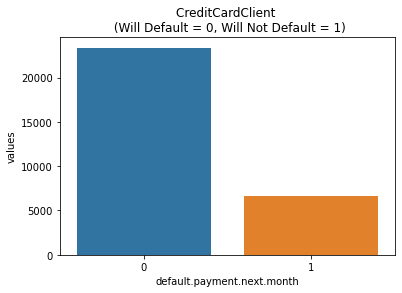

In [10]:
df = data["default.payment.next.month"].value_counts()
df1 = pd.DataFrame({'default.payment.next.month': df.index,'values': df.values})
plt.title('CreditCardClient \n (Will Default = 0, Will Not Default = 1)')
sns.barplot(x = 'default.payment.next.month', y="values", data=df1)
plt.show()

We see that the data does not have a large imbalance with respect to default.payment.next.month.

## 4. Create training and test sets
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, we split into train (80%) and test (20%) sets. We can do feature scaling through standardization.

In [11]:
X = data.drop(['default.payment.next.month'],axis=1)
y = data['default.payment.next.month']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [13]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [14]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

## 5. Compare Models
The ML models used for this analysis are: GradientBoostingClassifier, RandomForestClassifier, LogisticRegression, GaussianNaiveBayes & SupportVectorClassifier.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(X_train_scaled, y_train)
y_pred = GradientBoost.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
res=pd.DataFrame([['GradientBoost', acc]], columns = ['Model', 'Accuracy'])
data.append(res,sort=True)
res

,Model,Accuracy
0,GradientBoost,0.685167


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc =RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
res=pd.DataFrame([['RandomForestClassifier', acc]], columns = ['Model', 'Accuracy'])
data.append(res,sort=True)
res

,Model,Accuracy
0,RandomForestClassifier,0.803667


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistreg =LogisticRegression()
logistreg.fit(X_train_scaled, y_train)
y_pred = logistreg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
res=pd.DataFrame([['LogisticRegression', acc]], columns = ['Model', 'Accuracy'])
data.append(res,sort=True)
res

,Model,Accuracy
0,LogisticRegression,0.806


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GausNB = GaussianNB()
GausNB.fit(X_train_scaled, y_train)
y_pred = GausNB.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
res=pd.DataFrame([['Gaussian Naive Bayes', acc]], columns = ['Model', 'Accuracy'])
data.append(res,sort=True)
res

,Model,Accuracy
0,Gaussian Naive Bayes,0.696667


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SupVec =SVC()
SupVec.fit(X_train_scaled, y_train)
y_pred = SupVec.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
res=pd.DataFrame([['Support Vector Classification', acc]], columns = ['Model', 'Accuracy'])
data.append(res,sort=True)
res

,Model,Accuracy
0,Support Vector Classification,0.814667
